In [1]:
import os
import sys

sys.path.append(os.path.abspath('..'))

In [2]:
from typing import Dict, List, Optional, Any
from datetime import datetime

import httpx
from loguru import logger
from smolagents import CodeAgent, LiteLLMModel, Tool, PromptTemplates
import yaml

import src.agent.adapters.tools  as tools

In [3]:
api_base=None

# model_id="ollama/qwen3:4b"
# api_base="http://localhost:11434"

# anthorpic
# model_id="claude-3-7-sonnet-20250219"

#openai
model_id = "gpt-4o"

# google
# model_id = "gemini/gemini-2.0-flash-exp"
# model_id = "gemin/gemini-2.5-flash-preview-04-17"
# model_id = "gemini/gemini-2.5-pro-preview-05-06"

kwargs = {"tools_api_base": "http://localhost:5050"}

In [4]:
model = LiteLLMModel(model_id=model_id, api_base=api_base)

/Users/steffen/miniconda3/envs/py312/lib/python3.12/site-packages/pydantic/_internal/_config.py:345: UserWarning: Valid config keys have changed in V2:
* 'fields' has been removed
  warnings.warn(message, UserWarning)


In [5]:
with open("/Users/steffen/agentic_ai/src/agent/prompts/base_prompts.yaml", "r") as file:
    base_prompts = yaml.safe_load(file)


base_prompts['system_prompt'] = base_prompts['system_prompt'].replace("{{current_date}}", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
prompt_templates = PromptTemplates(**base_prompts)

In [6]:
class FinalAnswerTool(Tool):
    name = "final_answer"
    description = "Provides a final answer to the given problem."
    inputs = {"answer": {"type": "any", "description": "The final answer to the problem"}}
    outputs = {"result": {"type": "any", "description": "The final response to the problem"}}
    output_type = "any"

    def forward(self, answer: Any) -> Any:
        return answer


In [7]:
agent = CodeAgent(tools=[tools.CompareData(**kwargs), 
                         tools.ConvertIdToName(**kwargs),
                         tools.ConvertNameToId(**kwargs),
                         tools.GetData(**kwargs),
                         tools.GetInformation(**kwargs),
                         tools.GetNeighbors(**kwargs),
                         tools.PlotData(**kwargs),
                         FinalAnswerTool()
                        ],  
                  model=model, 
                  stream_outputs=True,
                  additional_authorized_imports=["pandas", "numpy"],
                  prompt_templates=prompt_templates,
                  max_steps=5)

In [8]:
result = agent.run("What is the daily maximum value of PI-P0017 in April 2025?")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What is the daily maximum value of PI-P0017 in April 2025?                                                      │
│                                                                                                                 │
╰─ LiteLLMModel - gpt-4o ─────────────────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output()

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Get the asset id for PI-P0017                                                                                  
  asset_id_info = name_to_id(["PI-P0017"])                                                                         
  print(asset_id_info)                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

2025-05-15 11:19:09.671 | INFO     | src.agent.adapters.tools.base:call_api:74 - Fetching data from http://localhost:5050/v1/id_from_name/PI-P0017 with params: {'offset': 0, 'limit': 100}
2025-05-15 11:19:09.696 | INFO     | src.agent.adapters.tools.base:call_api:88 - Reached the last page.


Execution logs:
{'asset_ids': ['18b04353-839d-40a1-84c1-9b547d09dd80']}

Out: None

[Step 1: Duration 3.41 seconds| Input tokens: 1,960 | Output tokens: 83]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output()

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Retrieve the daily data for PI-P0017 for April 2025                                                            
  asset_id = '18b04353-839d-40a1-84c1-9b547d09dd80'                                                                
  start_date = "2025-04-01T00:00:00Z"                                                                              
  end_date = "2025-04-30T23:59:59Z"                                                                                
                                                                                                                   
  data = get_data(asset_ids=[asset_id], start_date=start_date, end_date=end_date, aggregation='day',               
  last_value=False)                                                                                                
  print(data)                                                                                                      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

2025-05-15 11:19:14.040 | INFO     | src.agent.adapters.tools.base:call_api:74 - Fetching data from http://localhost:5050/v1/data/18b04353-839d-40a1-84c1-9b547d09dd80 with params: {'last_value': False, 'start_date': '2025-04-01T00:00:00', 'end_date': '2025-04-30T23:59:59', 'aggregation': 'd', 'offset': 0, 'limit': 100}
2025-05-15 11:19:14.368 | INFO     | src.agent.adapters.tools.base:call_api:88 - Reached the last page.


Execution logs:
{'data':                      18b04353-839d-40a1-84c1-9b547d09dd80
timestamp                                                
2025-04-01T00:00:00                              1.588889
2025-04-02T00:00:00                              1.556674
2025-04-03T00:00:00                              1.458451
2025-04-04T00:00:00                              1.481194
2025-04-05T00:00:00                              1.378924
2025-04-06T00:00:00                              1.267590
2025-04-07T00:00:00                              1.261139
2025-04-08T00:00:00                              1.290472
2025-04-09T00:00:00                              1.241875
2025-04-10T00:00:00                              1.178278
2025-04-11T00:00:00                              1.025847
2025-04-12T00:00:00                              1.014632
2025-04-13T00:00:00                              0.948687
2025-04-14T00:00:00                              0.888639
2025-04-15T00:00:00                              0.945736
2025-04-16T00:00:00                              0.842243
2025-04-17T00:00:00                              0.785375
2025-04-18T00:00:00                              0.804521
2025-04-19T00:00:00                              0.783035
2025-04-20T00:00:00                              0.699667
2025-04-21T00:00:00                              0.635833
2025-04-22T00:00:00                              0.625757
2025-04-23T00:00:00                              0.619875
2025-04-24T00:00:00                              0.515604
2025-04-25T00:00:00                              0.608785
2025-04-26T00:00:00                              0.500250
2025-04-27T00:00:00                              0.435174
2025-04-28T00:00:00                              0.363062
2025-04-29T00:00:00                              0.378806
2025-04-30T00:00:00                              0.355576}

Out: None

[Step 2: Duration 4.68 seconds| Input tokens: 4,117 | Output tokens: 272]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output()

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import pandas as pd                                                                                              
                                                                                                                   
  # Construct the DataFrame from the provided data                                                                 
  data_dict = {                                                                                                    
      'timestamp': [                                                                                               
          "2025-04-01T00:00:00", "2025-04-02T00:00:00", "2025-04-03T00:00:00",                                     
          "2025-04-04T00:00:00", "2025-04-05T00:00:00", "2025-04-06T00:00:00",                                     
          "2025-04-07T00:00:00", "2025-04-08T00:00:00", "2025-04-09T00:00:00",                                     
          "2025-04-10T00:00:00", "2025-04-11T00:00:00", "2025-04-12T00:00:00",                                     
          "2025-04-13T00:00:00", "2025-04-14T00:00:00", "2025-04-15T00:00:00",                                     
          "2025-04-16T00:00:00", "2025-04-17T00:00:00", "2025-04-18T00:00:00",                                     
          "2025-04-19T00:00:00", "2025-04-20T00:00:00", "2025-04-21T00:00:00",                                     
          "2025-04-22T00:00:00", "2025-04-23T00:00:00", "2025-04-24T00:00:00",                                     
          "2025-04-25T00:00:00", "2025-04-26T00:00:00", "2025-04-27T00:00:00",                                     
          "2025-04-28T00:00:00", "2025-04-29T00:00:00", "2025-04-30T00:00:00"],                                    
      'values': [                                                                                                  
          1.588889, 1.556674, 1.458451, 1.481194, 1.378924, 1.267590, 1.261139,                                    
          1.290472, 1.241875, 1.178278, 1.025847, 1.014632, 0.948687, 0.888639,                                    
          0.945736, 0.842243, 0.785375, 0.804521, 0.783035, 0.699667, 0.635833,                                    
          0.625757, 0.619875, 0.515604, 0.608785, 0.500250, 0.435174, 0.363062,                                    
          0.378806, 0.355576]                                                                                      
  }                                                                                                                
                                                                                                                   
  df = pd.DataFrame(data_dict)                                                                                     
  df['timestamp'] = pd.to_datetime(df['timestamp'])                                                                
                                                                                                                   
  # Calculate the maximum value                                                                                    
  max_value = df['values'].max()                                                                                   
  final_answer(max_value)                                                                                          
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: 1.588889

[Step 3: Duration 9.47 seconds| Input tokens: 7,240 | Output tokens: 999]

## Tests

In [10]:
tasks = [
    "Can you compare PI-P0017 and PI-P0016 for the first 10 days in 2025?",
    "What assets are next to asset BA100?",
    "Can you create a plot for the adjacent sensors of asset BA101 for 1st January 2025?",
    "What is the id of TI-T0022?",
    "What is the name of asset id c831fadb-d620-4007-bdda-4593038c87f9?",
    "Can you provide me the highest value for June 2025 for TI-T0022?"
]

In [ ]:
result = agent.run(tasks[0])

In [ ]:
result = agent.run(tasks[1])

In [11]:
result = agent.run(tasks[2])

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you create a plot for the adjacent sensors of asset BA101 for 1st January 2025?                             │
│                                                                                                                 │
╰─ LiteLLMModel - gpt-4o ─────────────────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output()

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  out = name_to_id(["BA101"])                                                                                      
  print(out)                                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

2025-05-14 21:21:27.209 | INFO     | src.agent.adapters.tools.base:call_api:74 - Fetching data from http://localhost:5050/v1/id_from_name/BA101 with params: {'offset': 0, 'limit': 100}
2025-05-14 21:21:27.245 | INFO     | src.agent.adapters.tools.base:call_api:88 - Reached the last page.


Execution logs:
{'asset_ids': ['df5361a1-37b0-4860-b3ef-81a3fe5d624f']}

Out: None

[Step 1: Duration 2.38 seconds| Input tokens: 1,965 | Output tokens: 73]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output()

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  neighbor_ids = get_neighbors(['df5361a1-37b0-4860-b3ef-81a3fe5d624f'])                                           
  print(neighbor_ids)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

2025-05-14 21:21:29.633 | INFO     | src.agent.adapters.tools.base:call_api:74 - Fetching data from http://localhost:5050/v1/neighbor/df5361a1-37b0-4860-b3ef-81a3fe5d624f with params: {'offset': 0, 'limit': 100}
2025-05-14 21:21:29.665 | INFO     | src.agent.adapters.tools.base:call_api:88 - Reached the last page.


Execution logs:
{'asset_ids': ['91c0992d-8db1-4803-82a9-b2319d459f16', 'd656698b-95a8-4e6b-a220-ead9ce1ed7bd', 
'b6044032-31a5-4027-b163-5bc329e5ccb5', '5c622939-718f-4ca2-93dd-c11d6190fdcc', 
'dba34c7b-f84f-4f6e-823f-f1195e66150b', '10cae02b-5945-45de-ba93-2827d408f00a']}

Out: None

[Step 2: Duration 2.42 seconds| Input tokens: 4,106 | Output tokens: 165]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output()

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  data = get_data(['91c0992d-8db1-4803-82a9-b2319d459f16', 'd656698b-95a8-4e6b-a220-ead9ce1ed7bd',                 
  'b6044032-31a5-4027-b163-5bc329e5ccb5', '5c622939-718f-4ca2-93dd-c11d6190fdcc',                                  
  'dba34c7b-f84f-4f6e-823f-f1195e66150b', '10cae02b-5945-45de-ba93-2827d408f00a'],                                 
                   "2025-01-01T00:00:00Z", "2025-01-01T23:59:59Z", "hour", False)                                  
  print(data["data"])                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

2025-05-14 21:21:34.282 | INFO     | src.agent.adapters.tools.base:call_api:74 - Fetching data from http://localhost:5050/v1/data/5c622939-718f-4ca2-93dd-c11d6190fdcc with params: {'last_value': False, 'start_date': '2025-01-01T00:00:00', 'end_date': '2025-01-01T23:59:59', 'aggregation': 'h', 'offset': 0, 'limit': 100}
2025-05-14 21:21:34.374 | INFO     | src.agent.adapters.tools.base:call_api:88 - Reached the last page.
2025-05-14 21:21:34.374 | INFO     | src.agent.adapters.tools.base:call_api:74 - Fetching data from http://localhost:5050/v1/data/91c0992d-8db1-4803-82a9-b2319d459f16 with params: {'last_value': False, 'start_date': '2025-01-01T00:00:00', 'end_date': '2025-01-01T23:59:59', 'aggregation': 'h', 'offset': 0, 'limit': 100}
2025-05-14 21:21:34.413 | INFO     | src.agent.adapters.tools.base:call_api:88 - Reached the last page.
2025-05-14 21:21:34.415 | INFO     | src.agent.adapters.tools.base:call_api:74 - Fetching data from http://localhost:5050/v1/data/d656698b-95a8-4e6b-a

Execution logs:
                     91c0992d-8db1-4803-82a9-b2319d459f16  \
timestamp                                                   
2025-01-01T00:00:00                              1.526833   
2025-01-01T01:00:00                              1.868833   
2025-01-01T02:00:00                              2.169167   
2025-01-01T03:00:00                              1.024667   
2025-01-01T04:00:00                              1.181667   
2025-01-01T05:00:00                              1.249333   
2025-01-01T06:00:00                              1.336000   
2025-01-01T07:00:00                              1.151667   
2025-01-01T08:00:00                              0.594333   
2025-01-01T09:00:00                              1.297333   
2025-01-01T10:00:00                              1.738333   
2025-01-01T11:00:00                              0.779167   
2025-01-01T12:00:00                              1.174500   
2025-01-01T13:00:00                              1.900333   
2025-01-01T14:00:00                              1.035000   
2025-01-01T15:00:00                              1.441000   
2025-01-01T16:00:00                              1.203333   
2025-01-01T17:00:00                              1.550167   
2025-01-01T18:00:00                              1.563167   
2025-01-01T19:00:00                              1.932667   
2025-01-01T20:00:00                              1.878333   
2025-01-01T21:00:00                              1.628333   
2025-01-01T22:00:00                              1.943333   
2025-01-01T23:00:00                              1.488500   

                     d656698b-95a8-4e6b-a220-ead9ce1ed7bd  \
timestamp                                                   
2025-01-01T00:00:00                             30.960500   
2025-01-01T01:00:00                             32.009833   
2025-01-01T02:00:00                             34.236333   
2025-01-01T03:00:00                             32.892000   
2025-01-01T04:00:00                             32.586500   
2025-01-01T05:00:00                             31.181500   
2025-01-01T06:00:00                             32.889500   
2025-01-01T07:00:00                             32.404833   
2025-01-01T08:00:00                             33.590833   
2025-01-01T09:00:00                             30.364333   
2025-01-01T10:00:00                             31.830167   
2025-01-01T11:00:00                             32.255167   
2025-01-01T12:00:00                             33.205500   
2025-01-01T13:00:00                             32.135167   
2025-01-01T14:00:00                             33.403167   
2025-01-01T15:00:00                             32.305667   
2025-01-01T16:00:00                             33.234667   
2025-01-01T17:00:00                             33.998833   
2025-01-01T18:00:00                             32.800167   
2025-01-01T19:00:00                             34.201500   
2025-01-01T20:00:00                             34.012000   
2025-01-01T21:00:00                             33.232667   
2025-01-01T22:00:00                             33.656167   
2025-01-01T23:00:00                             32.535333   

                     10cae02b-5945-45de-ba93-2827d408f00a  \
timestamp                                                   
2025-01-01T00:00:00                                   1.0   
2025-01-01T01:00:00                                   1.0   
2025-01-01T02:00:00                                   1.0   
2025-01-01T03:00:00                                   1.0   
2025-01-01T04:00:00                                   1.0   
2025-01-01T05:00:00                                   1.0   
2025-01-01T06:00:00                                   1.0   
2025-01-01T07:00:00                                   1.0   
2025-01-01T08:00:00                                   1.0   
2025-01-01T09:00:00                                   1.0   
2025-01-01T10:00:00                                   1.0   
2025-01-01T11:00:

[Step 3: Duration 4.90 seconds| Input tokens: 6,585 | Output tokens: 408]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output()

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  plot_result = plot_data(data["data"])                                                                            
  final_answer(plot_result)                                                                                        
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: {'plot': 
'iVBORw0KGgoAAAANSUhEUgAABAUAAAIjCAYAAAB73KJlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbW
F0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQABAABJREFUeJzs3QecE1XXx/Gz9A7SO1KkCwgKolgRCxbsXbH33gsq9l4fe8OKv
TdULNgoAvaOoiAd6b3sPJ//HSZMQrKbhV12kvy+75tn3WQ2uZmZhLnnnntunud5ngEAAAAAgJxTprQbAAAAAAAASgdBAQAAAAAAchRBAQAAAAAAchRB
AQAAAAAAchRBAQAAAAAAchRBAQAAAAAAchRBAQAAAAAAchRBAQAAAAAAchRBAQAAAAAAchRBAQBA5B1zzDG26aabWq6K8vvf2G0bM2aMVahQwf755x/
LBX///bfl5eXZE088EbvvkksusV69epVquwAA2YOgAACgVKijk87t008/tah21o499lhr3bq1VapUyRo2bGjbb7+9XXXVVZYNdtxxx7jjULt2bdtqq6
3s8ccft/z8/GJ5jRtuuMFef/31Iv3N5Zdfbocddpi1aNFinbZuttlmSf/mww8/jL2Pl19+2TLdOeecY9999529+eabpd0UAEAWKFfaDQAA5Kann3467
vennnrKdd4S7+/QoYM98sgjxdYRLQ4TJkxwHeTKlSvbcccd50bKp02bZuPHj7ebb77Zrr766mJ9vdJ6/02bNrUbb7zR/fesWbPcMTr++OPt999/t5tu
uqlYggIHHnig7bvvvmlt/+2339rw4cPtq6++WucxBWZ0XJRJ0LNnz7jHnn32Wff4smXLLBsoADVgwAC77bbbbJ999int5gAAMhxBAQBAqTjyyCPjfh8
1apQLCiTeH0V33nmnLVq0yHVSwyPWMnPmzGJ7ncWLF1vVqlWtfPnyVhpq1qwZdzxOPvlka9eund1777127bXXbvR2DRkyxJo3b25bb731Oo8pY2PVql
X23HPPxQUFFAh47bXXbM8997RXXnnFssXBBx9sBx10kP3111/WqlWr0m4OACCDMX0AABB5ifPWg3nWGim97777XKeoSpUqtuuuu9rkyZPN8zzXadVIt
0bzNao6Z86cdZ73vffes+222851vKtXr+46jj/99FOh7fnzzz/dcycGBKR+/frr9Tp6j9WqVXPP3b9/f7fdEUcckfT9izIH7rrrLuvUqZMbBW/QoIHr
tM+dOzduu7Fjx9puu+1mdevWdfuiZcuWLrthfWgfq0OuYIUyB1LR4+eff741a9bMKlas6AIJOlY6LgEdP2335JNPxlL79T4LoqkGO++8s9s2GU0reOG
FF+KyKt566y1bsmSJ60QnUl2C0047zbVP+6ZOnTquo63zK0zz+fWaX375pZ133nlWr149dyz322+/dfaDths8ePA6r6XjF35/Oh8vuOAC23zzzd1xr1
Gjhu2xxx5uWkA6dtllF/fzjTfeSGt7AABSISgAAMhYSgu///777cwzz3Sd0BEjRrjO36BBg2zYsGF28cUX20knneQ6huqAhWmagjrn6pAp5f+KK66wn
3/+2fr06bNOpzCRggEKPnz88ceFtrEor6ORbnXgFVhQJ/qAAw5I+bwKAFx44YW27bbb2t133+3qG2h/6O9XrlwZy1pQoESvo+J0//vf/1ygQVkZ60sj
02XLlrVatWolfVwdf6W0K5ti9913tzvuuMN1utVWdajD+0UBAwVL9N+66T2lMmXKFJs0aZJ179495TaHH364m8YRrkMxdOhQ69u3b9Jgzddff+2mIhx
66KF2zz332CmnnGIfffSRq1GgQEIinWfqtKtuxKmnnurOqzPOOMPWdz8qyLHXXnu5faT988MPP9gOO+xgU6dOTSuLQ9kRClQAALBBPAAAIuD000/XMH
LSxwYOHOi1aNEi9vvEiRPdtvXq1fPmzZsXu//SSy9193ft2tVbuXJl7P7DDjvMq1Chgrds2TL3+8KFC71atWp5J554YtzrTJ8+3atZs+Y69yf68ccfv
cqVK7vX6tatm3f22Wd7r7/+urd48eK47YryOnqPer5LLrmk0Pf/+eefu22fffbZuO2GDRsWd/9rr73mfv/666+9otphhx289u3be7NmzXK3X375xTvr
rLPc8+29994p26b9oG2uu+66uOc78MADvby8PG/ChAmx+6pWrer+Ph3Dhw93z/vWW28lbWunTp3cf2+55Zbe8ccf7/577ty57rg/+eST3ieffOL+/qW
XXor93ZIlS9Z5rpEjR7rtnnrqqdh9Q4YMcfftsssuXn5+fuz+c8891ytbtmzcOajtrrrqqnWeV/so/F51Lq5evTpuG53XFStW9K655pq4+/ScakOiXX
fd1evQoUPKfQYAQDrIFAAAZCylemvENBAs06Z58OXKlYu7f8WKFW60WVS7YN68eS7dfPbs2bGbRsC17SeffFLg6yplX/UE9DoahddIvYrlKYVfRQED6
/M6GoEuzEsvveTed79+/eKet0ePHi4jIXjeYDT/7bffjmUPFMWvv/7qUuV1U8FHZRoo60ErEKTy7rvvuvd31llnxd2vTA71mTWVYn38999/7ucmm2xS
4HbKFnj11Vfd8dZKA2qL0vyT0ZSBgPaPXqNNmzZuv6loZCJlnYSnLijLYfXq1eu1PKKyJMqU8S/D9Bx6bR07ZVUke+1ktC903AEA2BAUGgQAZCwVnQs
LAgSay57s/mC+/R9//OF+an56MprfXZi2bdu6lHd16DQdQB3vW265xXUcNW9fc76L+joKZKhWQWH0vPPnz0+aEh8udqhUdE1B0GoISudXWryCF+o4q1
NaGM2DV5BDHWHVLdCSf6leM6AOcuPGjV1NhDAFFYLHN0S4LkEymgqgqSIKPmg6hdLzE9sSWLp0qVtdQQUMFTAKP7f2b2HnWxCgSKzjkA7VPVAwSdNfJ
k6c6M6jgGobpEPtTVVfAQCAdBEUAABkLI0CF+X+oNMXFKJTp17LuyUKZxmk0wYVi9Otd+/ettNOO7nOqIICRX2d8OhxQfS86pzrdZLRyL6ow6jRctUQ
0Pz3999/3xUZvP322919GpkuiIrpBQXtSlvQUS6sA96oUSMX/NB71Hz7glYcUI0ABQTOOeccd+wUPNI+U2Ah2RKQhZ1XBQl3+oPlGFVfQsdDRTFr167
tjr3aku7yk9oXKiAJAMCGICgAAMg5KtAm6lgXZ6d3yy23dD9V7K4kX0fPO3z4cFdkMJwCn4pWDNDt+uuvd4X3VGzw+eeftxNOOMGKm4owqm0LFy6MG6
HXVITg8UBRRrnbt2/vfmpUvTDKhNB70zQAreSQigImAwcOdAGE8BKGmvKxvpQ9kPj3msoQnBPh11YA6bHHHou7X3+bbkdf+6Jr167r3VYAAISaAgCAn
KMK/Urd12htsrn2BS23J59//nnSv9N8etG88OJ4nVS0woJGnjXCnEgrGASdUo0kJ45id+vWzf1cvny5lQR1wtW2e++9N+5+TV9QEEDL7oUzEdLtgDdp
0sRNC9ESi4U58MAD3QoBSs2vUKFCyu008p+4f1Q3IXFUv6gBm88++yzuvocffnid50z22qoVEdS9KIymN2j5ym222Wa92woAgJApAADIOeqoP/DAA3b
UUUe5Je6ULq6Uey15984777gR+MRObZiWFhw3bpztv//+1qVLF3efisM99dRTLg1cKeDF8TqpqFaAlu/TfHgVPNSyg+XLl3e1BtSx1Fx1dYyffPJJ1z
FWoT11VjV6rxoBaldBI+gbYu+993Yj4JdffrkrwqiR7A8++MDeeOMNt1+C7AlRYURlFWhJPtUhUC2GoFhkMgMGDLDXXnut0Ln0mgYwePDgQtuqegOa2
qHtO3bsaCNHjnTtSXdOfzLKUND

[Step 4: Duration 2.21 seconds| Input tokens: 11,473 | Output tokens: 468]

In [14]:
base64_string_to_decode = result["plot"]

In [19]:
import matplotlib.image as mpimg

import base64
import io
import matplotlib.pyplot as plt


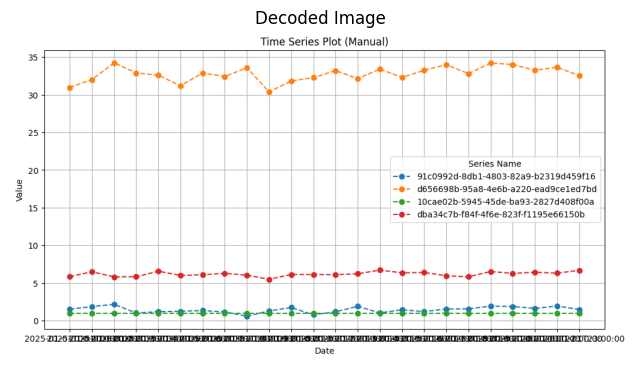

In [20]:
image_bytes = base64.b64decode(base64_string_to_decode)

# 2. Create an in-memory buffer from the bytes
image_buffer = io.BytesIO(image_bytes)

# 3. Load Image from Buffer using Matplotlib
# mpimg.imread can read from a file-like object
img_data = mpimg.imread(image_buffer, format='png') # Specify format if known (e.g., 'png', 'jpeg')

# 4. Display Image using Matplotlib
plt.figure(figsize=(8, 6)) # Optional: Adjust figure size
plt.imshow(img_data)
plt.axis('off')  # Turn off axis numbers and ticks for a cleaner image display
plt.title("Decoded Image")
plt.show()


In [ ]:
result = agent.run(tasks[3])

In [ ]:
result = agent.run(tasks[4])

In [ ]:
result = agent.run(tasks[5])

In [14]:
import jinja2
import yaml
from jinja2 import StrictUndefined, Template


In [15]:
with open("/Users/steffen/agentic_ai/src/agent/prompts/base_prompts.yaml", "r") as file:
    base_prompts = yaml.safe_load(file)


In [19]:
abc = base_prompts.get("final_answer",{}).get("final_answer", None)

In [20]:
def populate_template(template: str, variables: dict[str, Any]) -> str:
    compiled_template = Template(template, undefined=StrictUndefined)
    try:
        return compiled_template.render(**variables)
    except Exception as e:
        raise Exception(f"Error during jinja template rendering: {type(e).__name__}: {e}")


In [22]:
bc = populate_template(abc, {"query": "oh", "response": "my"})

In [33]:
command = "abc"
is_answered = True

In [38]:
while not is_answered and command is not None:
    print("hrlp")
    break

In [43]:
True and True

True